# 주제 : 심부전증 분류 예측

## 데이터 소개
- 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.

- 다음 1개의 csv 파일을 사용합니다.
heart_failure_clinical_records_dataset.csv

- 크레아틴 키나제 : 근육이 손상여부 파악가능한 효소, 손상될 때 증가

- 각 파일의 컬럼은 아래와 같습니다.
  - age: 환자의 나이
  - anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
  - creatinine_phosphokinase: 크레아틴키나제 검사 결과
  - diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
  - ejection_fraction: 박출계수 (%)
    - 심장이 뿜어내는 피
  - high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
  - platelets: 혈소판 수 (kiloplatelets/mL)
  - serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
  - serum_sodium: 혈중 나트륨 레벨 (mEq/L)
  - sex: 성별 (0: 여성, 1: 남성)
  - smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
  - time: 관찰 기간 (일)
  - DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../../data/heart_failure_clinical_records_dataset.csv')

In [6]:
df.head()
#DEATH_EVENt y값으로 가자

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
df.info()
#데이터 각 픽들 컴럼 특징값 의 타입
# 1번 빈혈, 3번 - 당뇨, 5번 - 혈압여부, 9 - 성별,  10 - 흡연여부 12- 사망여부 는 범주형 데이터 셋임
# 12 - 사망여부는 y레이블값으로 처리해야하며, 0과 1로 구성되었이서 별도의 변환은 필요없음

# 1, 3, 5 ,9, 10, 12는 더미변수로 변환하여 작업할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [14]:

df[df.age>90]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [29]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [16]:
# [미션]
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<AxesSubplot:>

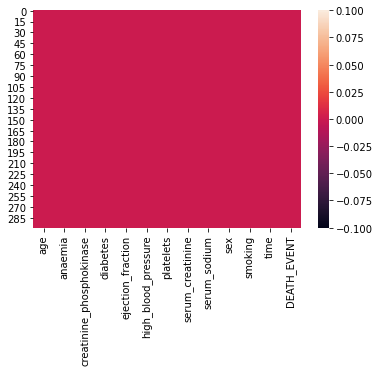

In [18]:
#[미션] 시각화
sns.heatmap(df.isna())

## 문제 5. 수치형 데이터의 히스토그램 그리기

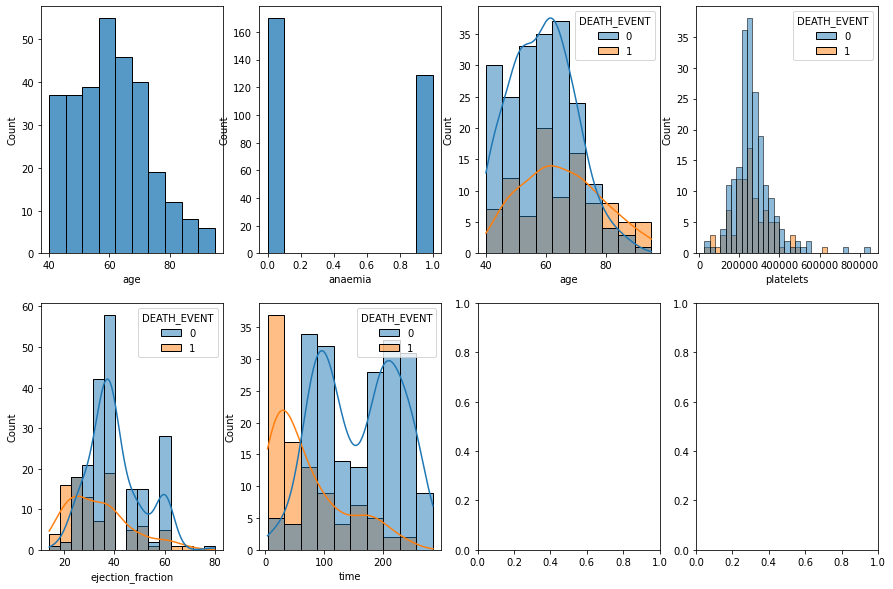

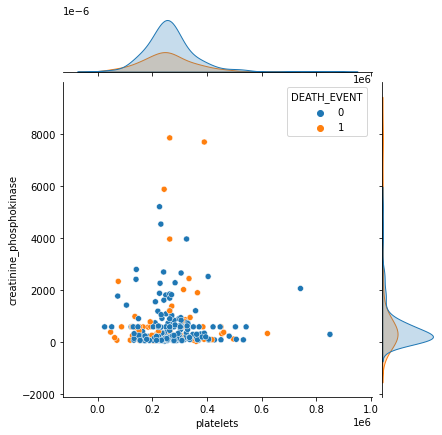

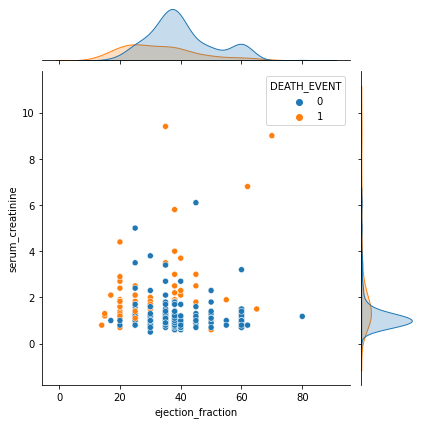

In [111]:
fig, axes = plt.subplots(2,4,figsize=(15,10))

sns.histplot(x='age', data=df, ax=axes[0][0])
sns.histplot(x='anaemia', data=df, ax=axes[0][1])
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True, ax=axes[0][2])
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT', ax=axes[0][3])
sns.histplot(x='ejection_fraction', data=df, hue='DEATH_EVENT', kde=True, ax=axes[1][0])
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True, ax=axes[1][1])
sns.jointplot(x='platelets', y='creatinine_phosphokinase',data=df,hue='DEATH_EVENT', ax=axes[1][2])
sns.jointplot(x='ejection_fraction', y='serum_creatinine',data=df,hue='DEATH_EVENT', ax=axes[1][3])


## 모델학습을 위한 데이터 전처리

In [20]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
X_num = df[['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']] #범주형데이터셋
y = df['DEATH_EVENT']

In [22]:
from sklearn.preprocessing import StandardScaler

In [28]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기

scaler =StandardScaler()
scaler.fit(X_num) #fit을 해야 전처리 가능하게 코드가 되어있다
# fit 은  변환을 위한 기반 설정(예를 들어 학습 데이터 세트의 최대값/최소값등)

X_scale=scaler.transform(X_num) # 데이터 변환기
# transform  설정된 변환을 위한 기반 설정을 적용

# 스케일링된 데이터셋을 데이터프레임으로 만들고  범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_scale1=pd.DataFrame(data=X_scale,index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scale1, X_cat], axis=1)
X


StandardScaler()
StandardScaler()


,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-1.109765e+00,-0.284552,1.447094,0,1,1,1,1
295,-0.491279,1.278215,6.802472e-02,-0.187726,0.539054,0,0,0,0,0
296,-1.333392,1.525979,4.902082e+00,-0.575031,0.312044,0,1,0,0,0
297,-1.333392,1.890398,-1.263389e+00,0.005926,0.766064,0,0,0,1,1


In [33]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



## Classification 모델 학습하기

In [34]:
np.unique(y)

array([0, 1], dtype=int64)

In [52]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=5) #옵션 5번 돌려라
model_lr.fit(X_train, y_train)

C:\Users\TH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5)

In [67]:
# 1값 중 예측이 안맞는거
pred =model_lr.predict(X_test)

cnt = 0
tmp_list = []
for i,j in zip(y_test, pred):
    if i== j:
        tmp_list.append({'y':i, 'pred':j,'re':'O'})
    else:
        tmp_list.append({'y':i, 'pred':j,'re':'X'})
tmp = pd.DataFrame(tmp_list)
tmp[(tmp.y==1)&(tmp.re=='X')]

,y,pred,re
2,1,0,X
8,1,0,X
12,1,0,X
14,1,0,X
17,1,0,X
21,1,0,X
23,1,0,X
45,1,0,X
48,1,0,X
49,1,0,X


## 모델 평가

In [53]:
from sklearn.metrics import classification_report

In [54]:
pred = model_lr.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        64
           1       0.56      0.19      0.29        26

    accuracy                           0.72        90
   macro avg       0.65      0.56      0.56        90
weighted avg       0.69      0.72      0.67        90



In [56]:
(y_test-pred).sum()/len(pred)

0.18888888888888888

## 모델 학습결과 심화 분석하기

In [57]:
from sklearn.metrics import plot_precision_recall_curve
#정밀도와 재현도를 구현 

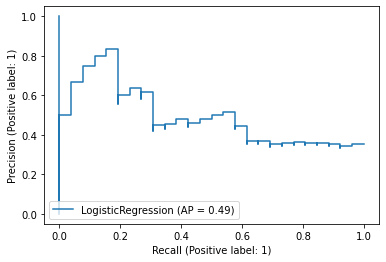

In [59]:
fig = plt.figure()
ax = fig.gca()
plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
#plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

In [60]:
from sklearn.metrics import plot_roc_curve

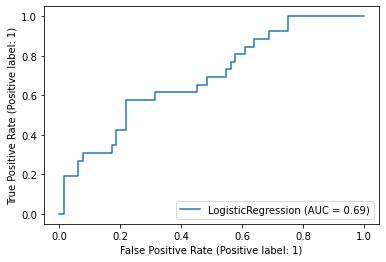

In [61]:
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
#plot_roc_curve(model_xgb, X_test, y_test, ax=ax)